In [11]:
import paddle
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# 设置数据读取器，API自动读取MNIST数据训练集
train_dataset = paddle.vision.datasets.MNIST(mode='train')
data = np.array(train_dataset[0][0])
label = np.array(train_dataset[0][1])

In [3]:
def showImage(data,label,flag=0):
    if flag==0:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'original image : {label[0]}') # 图像题目
        plt.show()
        return data,label
    if flag:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'encrypted image : {label[0]}\n method : {label[1]}') # 图像题目
        plt.show() 

In [6]:
class Speckle:  
    def __init__(self, noise_variance):  
        """  
        初始化加密器，设置Speckle噪声的方差  
        :param noise_variance: 控制Speckle噪声强度的方差  
        """  
        self.noise_variance = noise_variance  
  
    def add_speckle_noise(self, image,label):  
        """  
        为图像添加Speckle噪声  
        :param image: 输入的灰度图像数组  
        :return: 添加了Speckle噪声的图像数组  
        """  
        # 确保图像数据类型是浮点型  
        image_float = image.astype(np.float64)  
          
        # 生成均值为1，方差为noise_variance的随机噪声  
        mean = 1  
        speckle_noise = np.random.normal(mean, np.sqrt(self.noise_variance), image.shape)  
          
        # 标准化噪声，确保它的均值接近1  
        speckle_noise = speckle_noise / np.mean(speckle_noise)  
          
        # 将噪声与图像相乘来模拟Speckle噪声  
        noisy_image = image_float * speckle_noise  
          
        # 确保像素值在0-255之间  
        noisy_image = np.clip(noisy_image, 0, 255)  
          
        # 将图像数据转换回整数类型  
        noisy_image = noisy_image.astype(np.uint8)  
        transformed_label = np.append(label,'Speckle')
          
        return noisy_image ,transformed_label

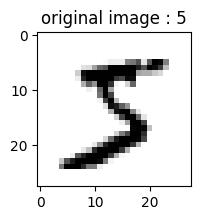

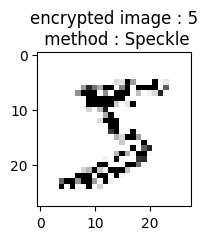

In [14]:
# 使用示例  
data,label = showImage(data,label)


encrypter = Speckle(noise_variance=random.randint(1,100))

encrypted_image,transformed_label = encrypter.add_speckle_noise(data,label)  # 加密图像  

showImage(encrypted_image,transformed_label,flag=1)

In [15]:
import random

# indexs = np.random.randint(0,60000,size=1000)
indexs = [i for i in range(1000)]

In [18]:
from PIL import Image  

def generate_encrypted_image(index):
    data ,label = np.array(train_dataset[index][0]),np.array(train_dataset[index][1])
    # 原始图像
    data,label = showImage(data,label)
      
    # 初始化加噪类
    noiser = Speckle(noise_variance=random.randint(1,100))

    # 对图像加噪  
    noisy_image_array,transformed_label = noiser.add_speckle_noise(data,label) 

    showImage(noisy_image_array,transformed_label,1)
    
    transformed_image = Image.fromarray(noisy_image_array)  
    transformed_image.save(f'../data/speckle_noise/{index}_{transformed_label[0]}_{transformed_label[1]}.png')

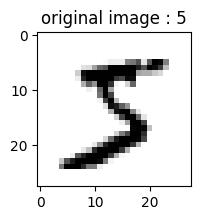

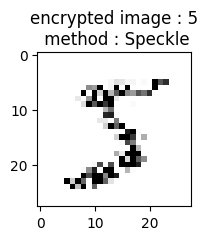

In [19]:
generate_encrypted_image(indexs[0])

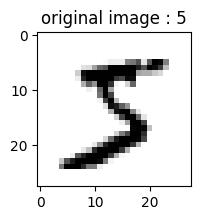

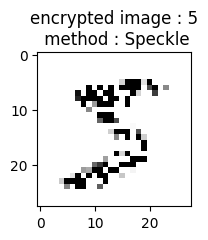

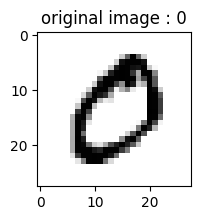

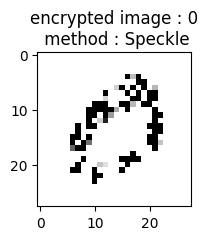

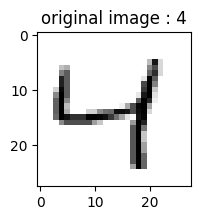

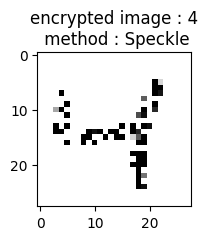

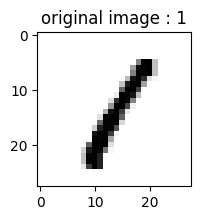

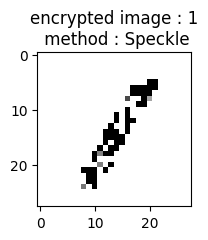

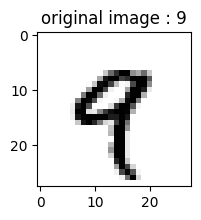

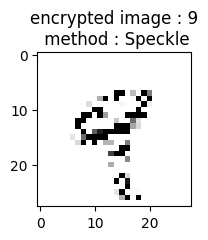

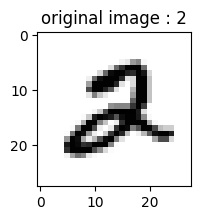

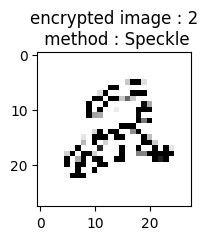

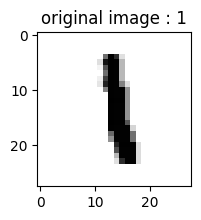

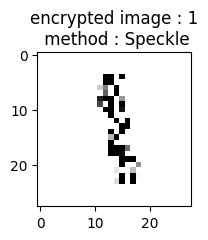

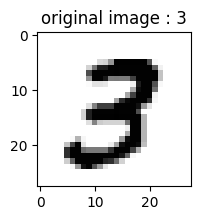

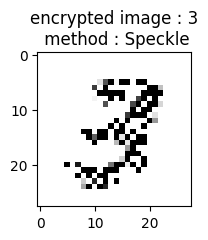

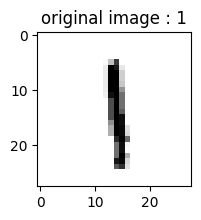

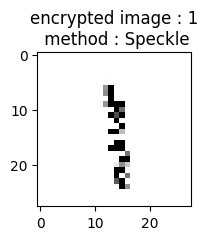

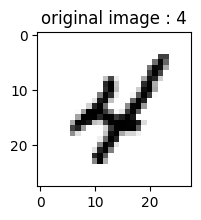

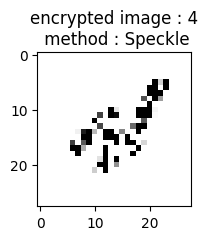

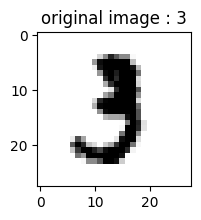

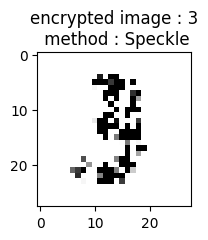

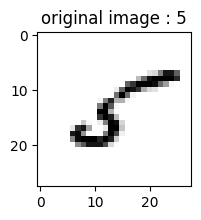

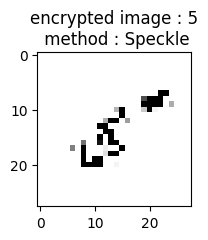

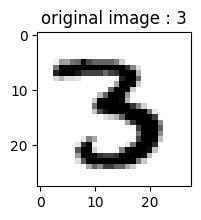

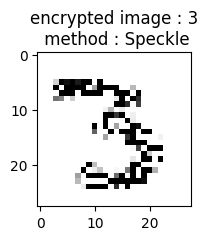

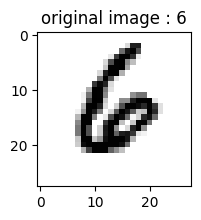

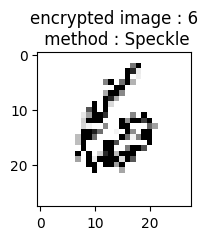

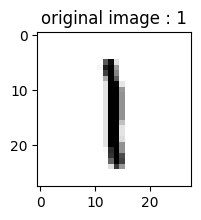

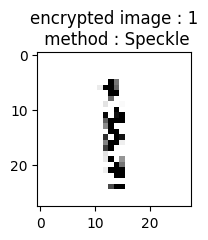

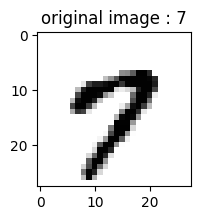

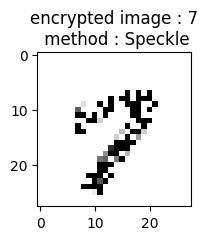

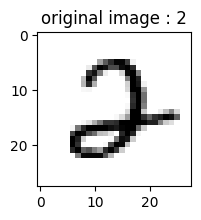

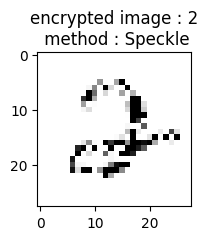

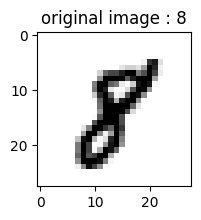

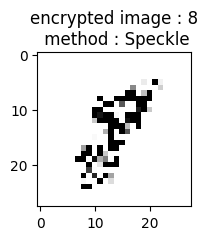

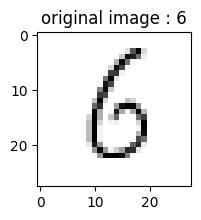

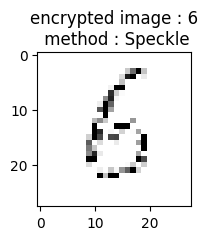

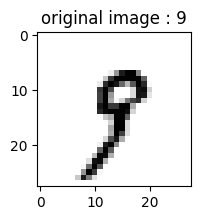

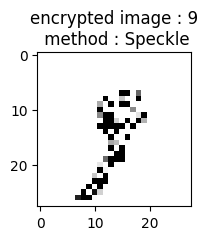

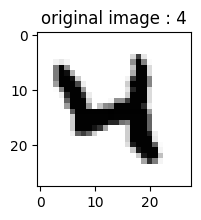

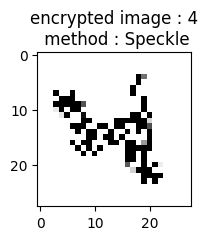

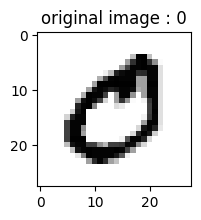

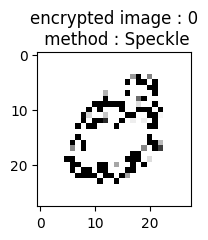

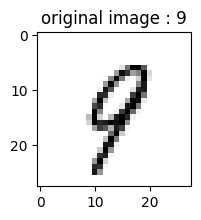

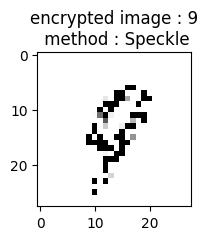

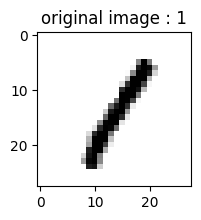

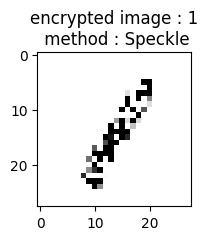

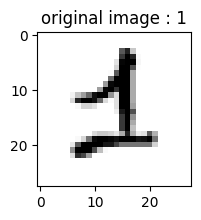

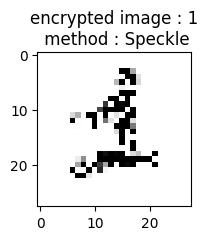

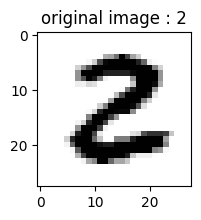

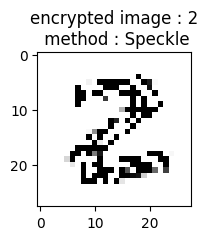

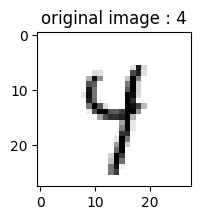

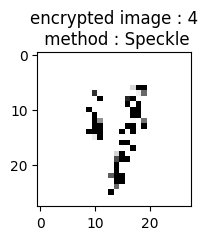

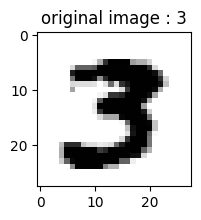

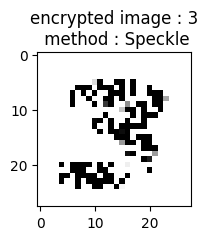

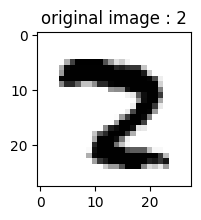

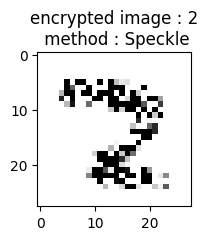

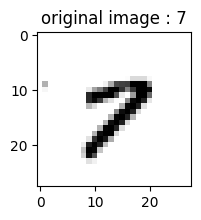

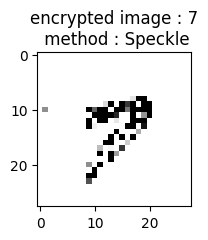

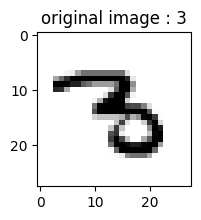

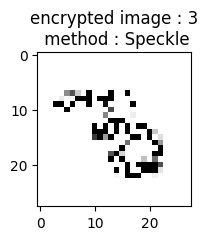

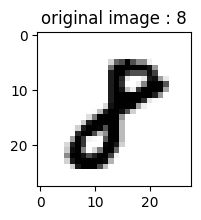

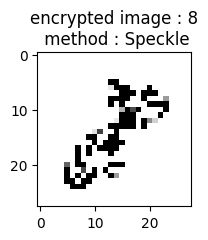

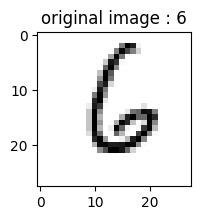

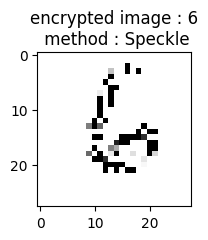

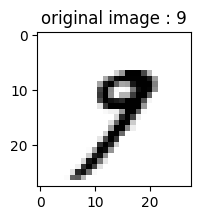

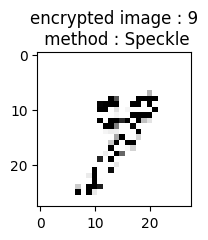

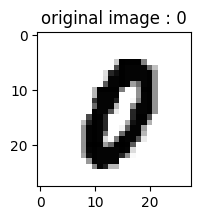

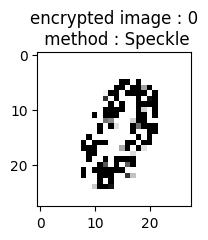

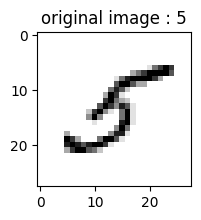

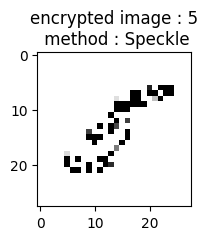

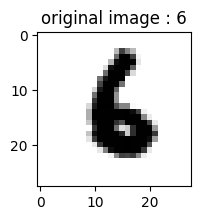

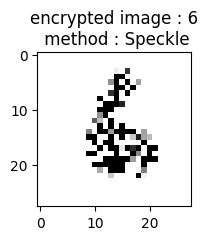

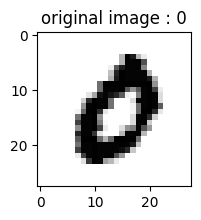

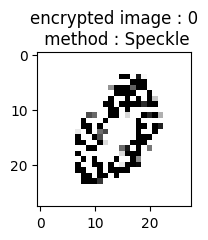

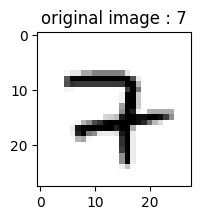

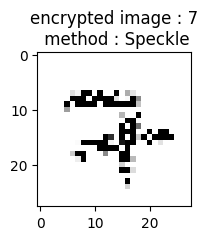

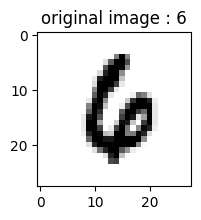

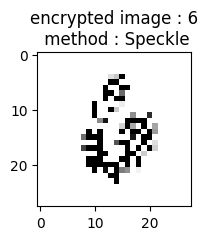

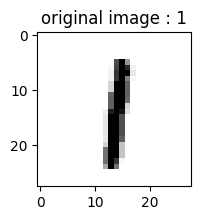

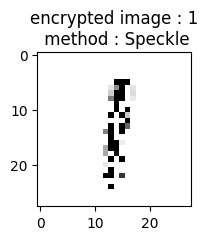

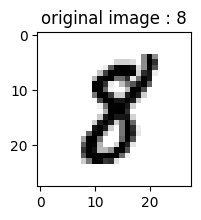

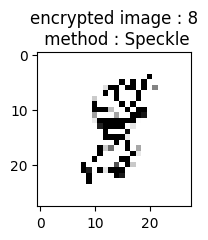

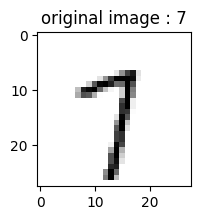

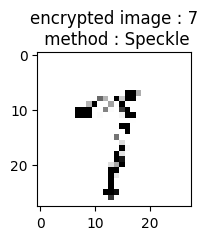

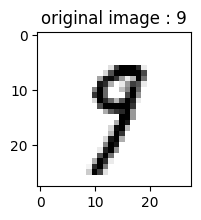

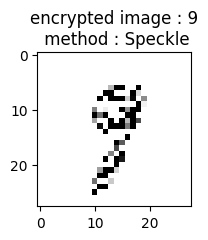

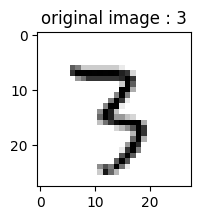

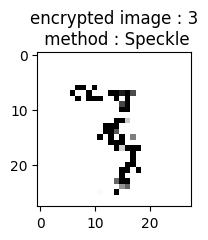

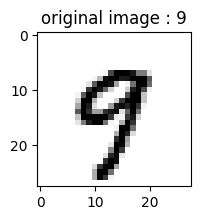

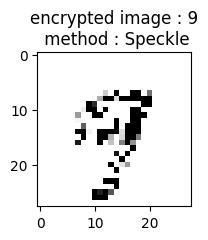

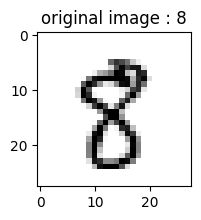

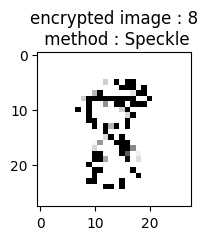

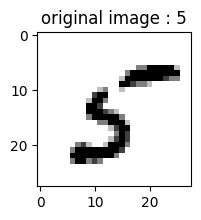

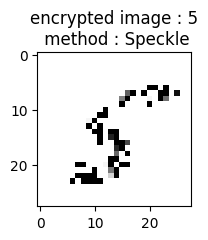

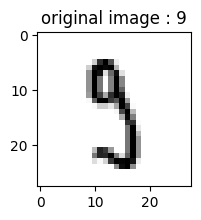

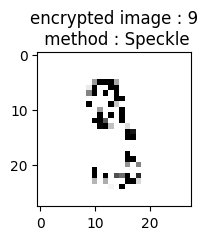

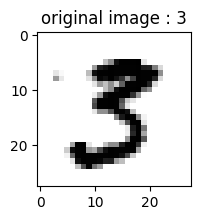

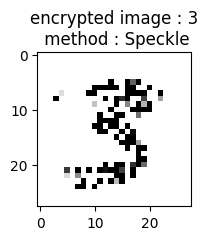

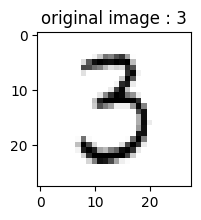

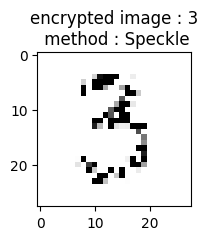

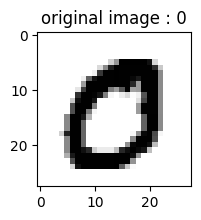

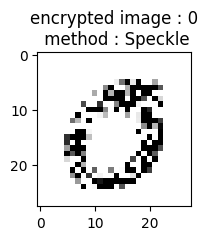

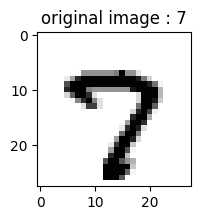

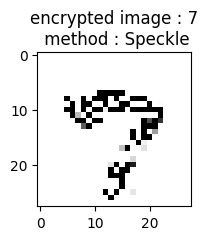

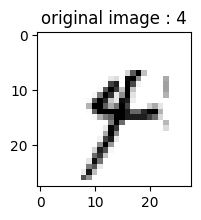

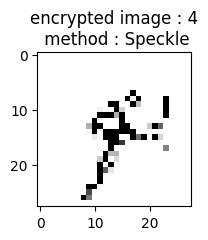

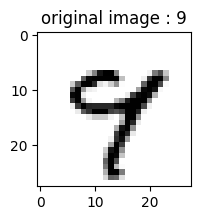

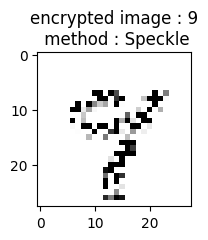

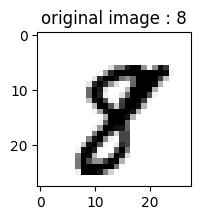

In [ ]:
for index in indexs:
    generate_encrypted_image(index)